In [4]:
import pandas as pd
df = pd.read_csv(r"C:\Users\swiftgo\Downloads\New folder\archive (2)\Emirates Airways Reviews.csv")
print(df.head())

                                       Title    Date Published         Status  \
0                "upgrade to business class"  12th August 2024  Trip Verified   
1            "14 hour horrendous experience"  11th August 2024  Trip Verified   
2  "not welcome and passengers are a burden"    29th July 2024   Not Verified   
3     "should be considered among the worst"    18th July 2024  Trip Verified   
4                  “services are very great”    13th July 2024   Not Verified   

         Aircraft     Travel Type    Travel Class  \
0      Boeing 777    Solo Leisure  Business Class   
1             NaN  Couple Leisure   Economy Class   
2  Boeing 777-300    Solo Leisure   Economy Class   
3            A380        Business   Economy Class   
4            A380  Family Leisure   Economy Class   

                               Route   Date Flown  Seating Comfort  \
0                    Dubai to Lisbon  August 2024              5.0   
1          Delhi to Boston via Dubai  August 2024     

In [6]:
df.describe()

,Seating Comfort,Staff Service,Food Quality,Entertainment,WiFi,Ground Service,Value for Money,Overall Rating
count,1477.000000,1476.000000,1418.000000,1380.000000,934.000000,1501.00000,1540.000000,1540.000000
mean,3.223426,2.977642,3.000000,3.704348,2.751606,2.85010,2.819481,4.814286
std,1.401284,1.592836,1.476707,1.376108,1.478815,1.59233,1.534489,3.331275
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,3.000000,1.000000,1.00000,1.000000,2.000000
50%,3.000000,3.000000,3.000000,4.000000,3.000000,3.00000,3.000000,4.000000
75%,4.000000,5.000000,4.000000,5.000000,4.000000,4.00000,4.000000,8.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,10.000000


In [8]:
df.shape

(1540, 19)

In [10]:
df.head()

,Title,Date Published,Status,Aircraft,Travel Type,Travel Class,Route,Date Flown,Seating Comfort,Staff Service,Food Quality,Entertainment,WiFi,Ground Service,Value for Money,Recommended,Overall Rating,Review,Country
0,"""upgrade to business class""",12th August 2024,Trip Verified,Boeing 777,Solo Leisure,Business Class,Dubai to Lisbon,August 2024,5.0,5.0,5.0,5.0,5.0,5.0,5,yes,10,I flew a return trip DXB-LIS-DXB I used my ...,United Arab Emirates
1,"""14 hour horrendous experience""",11th August 2024,Trip Verified,NaN,Couple Leisure,Economy Class,Delhi to Boston via Dubai,August 2024,1.0,1.0,3.0,3.0,2.0,3.0,2,no,4,We were 2 people travelling together and on...,India
2,"""not welcome and passengers are a burden""",29th July 2024,Not Verified,Boeing 777-300,Solo Leisure,Economy Class,Amsterdam to Phuket via Dubai,June 2024,2.0,1.0,4.0,2.0,3.0,3.0,2,no,5,"First time flying Emirates, was expecting a...",Netherlands
3,"""should be considered among the worst""",18th July 2024,Trip Verified,A380,Business,Economy Class,Manchester to Singapore via Dubai,July 2024,1.0,1.0,2.0,NaN,NaN,1.0,1,no,1,Ground Staff and Service Failures on Flight ...,Singapore
4,“services are very great”,13th July 2024,Not Verified,A380,Family Leisure,Economy Class,Bangkok to Hong Kong,August 2023,5.0,5.0,5.0,5.0,4.0,5.0,5,yes,10,The staff are friendly and the seat is comfo...,Hong Kong


In [34]:
df.isnull().sum()

Title                0
Date Published       0
Status             142
Aircraft           503
Travel Type          0
Travel Class         0
Route                2
Date Flown           0
Seating Comfort     63
Staff Service       64
Food Quality       122
Entertainment      160
WiFi               606
Ground Service      39
Value for Money      0
Recommended          0
Overall Rating       0
Review               0
Country              0
dtype: int64

<Axes: >

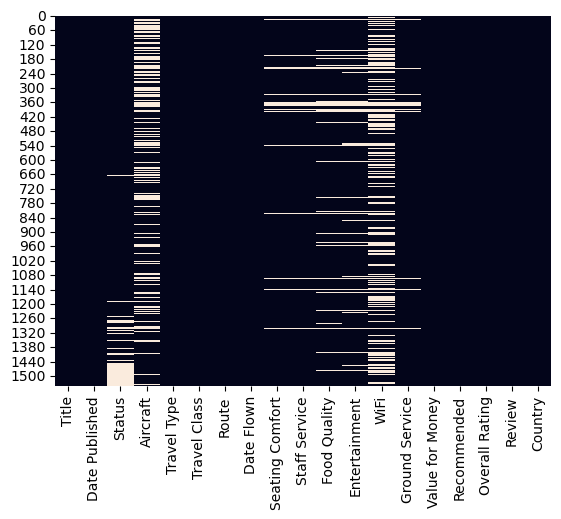

In [36]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

In [38]:
df.duplicated().sum()

0

In [42]:
df['Review'].str.len().describe()


count    1540.000000
mean      903.872078
std       602.016406
min       142.000000
25%       469.750000
50%       730.500000
75%      1159.250000
max      3490.000000
Name: Review, dtype: float64

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

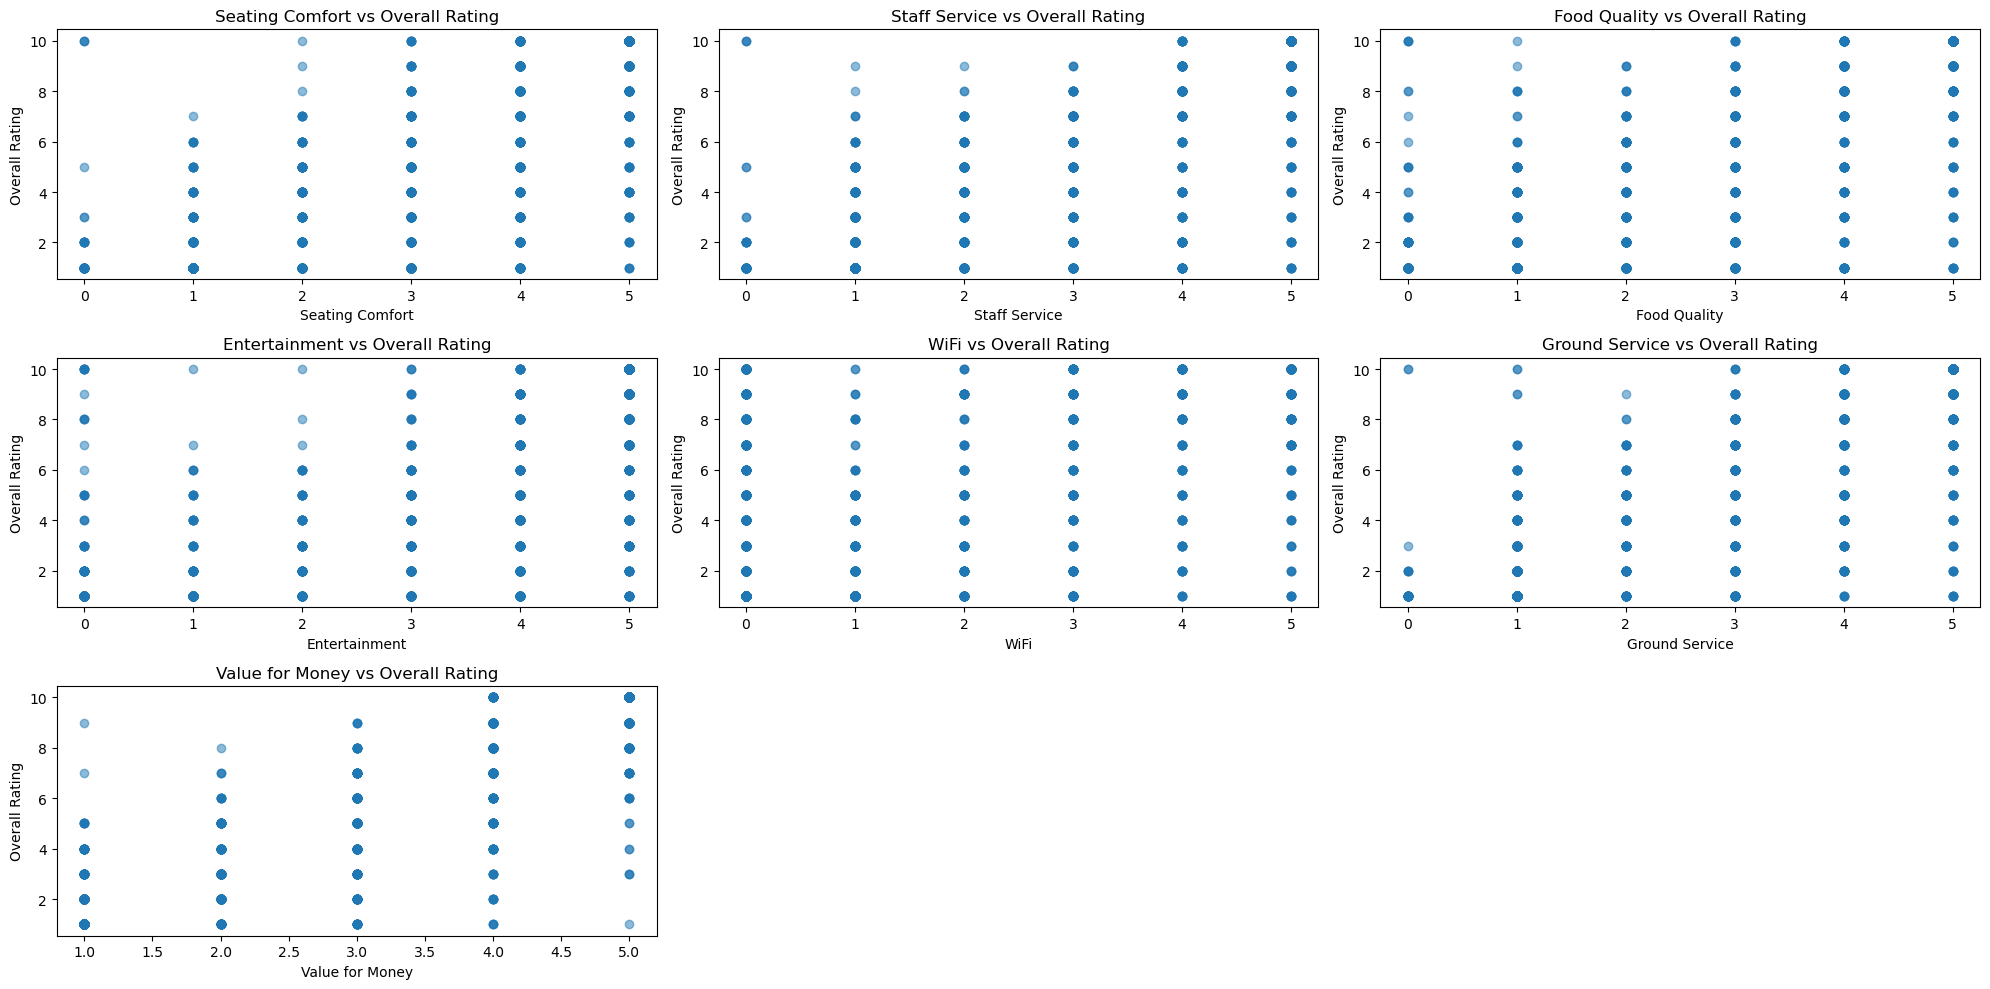

In [31]:
import matplotlib.pyplot as plt

numeric_cols = ['Seating Comfort','Staff Service','Food Quality',
                'Entertainment','WiFi','Ground Service','Value for Money']

plt.figure(figsize=(20,10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3,3,i)
    plt.scatter(df[col], df['Overall Rating'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel("Overall Rating")
    plt.title(f"{col} vs Overall Rating")

plt.tight_layout()
plt.show()


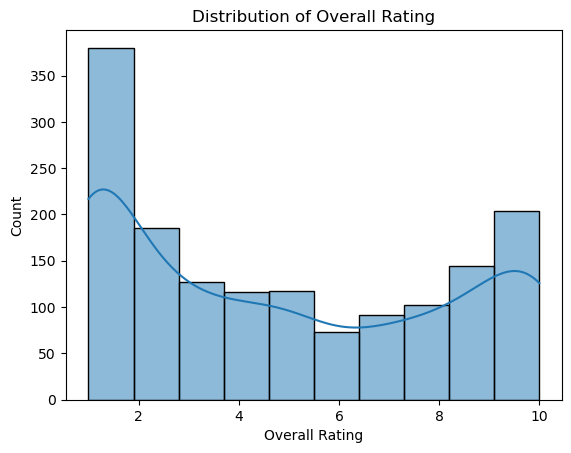

In [58]:
import seaborn as sns

sns.histplot(df['Overall Rating'], bins=10, kde=True)
plt.title("Distribution of Overall Rating")
plt.show()

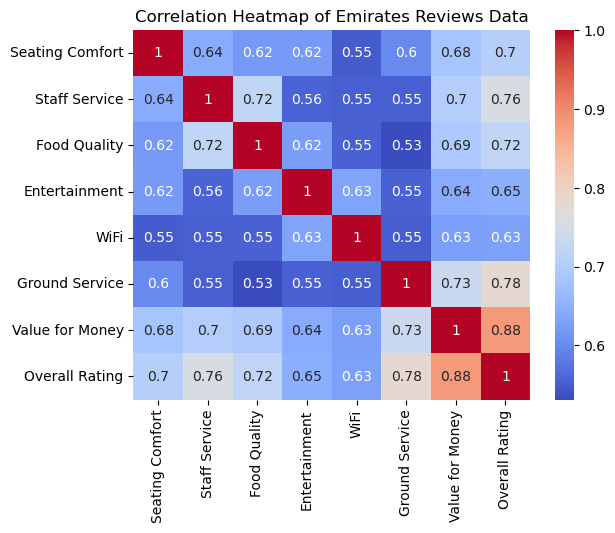

In [60]:
# Compute correlation between numeric columns
corr = df.corr(numeric_only=True)

# Plot heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Emirates Reviews Data")
plt.show()


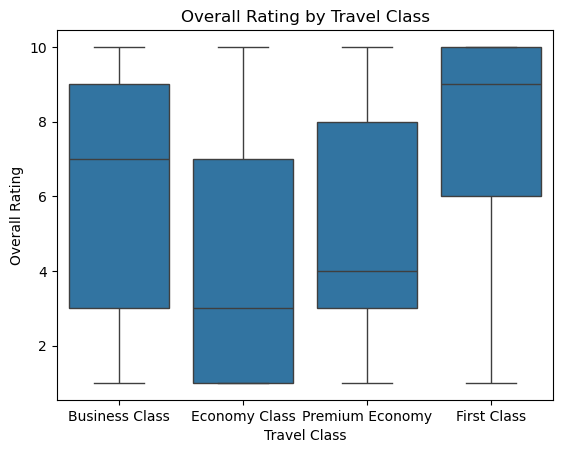

In [62]:
sns.boxplot(x="Travel Class", y="Overall Rating", data=df)
plt.title("Overall Rating by Travel Class")
plt.show()


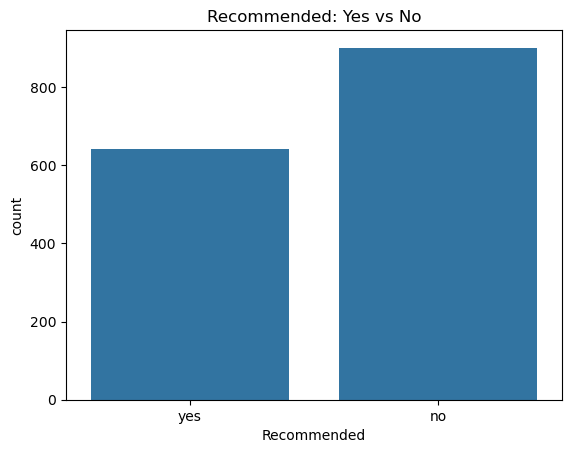

In [64]:
sns.countplot(x="Recommended", data=df)
plt.title("Recommended: Yes vs No")
plt.show()


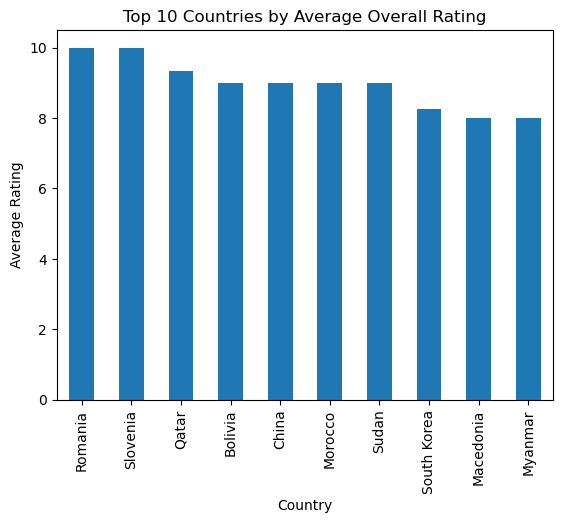

In [66]:
df_country = df.groupby("Country")["Overall Rating"].mean().nlargest(10)

df_country.plot(kind="bar")
plt.title("Top 10 Countries by Average Overall Rating")
plt.ylabel("Average Rating")
plt.show()


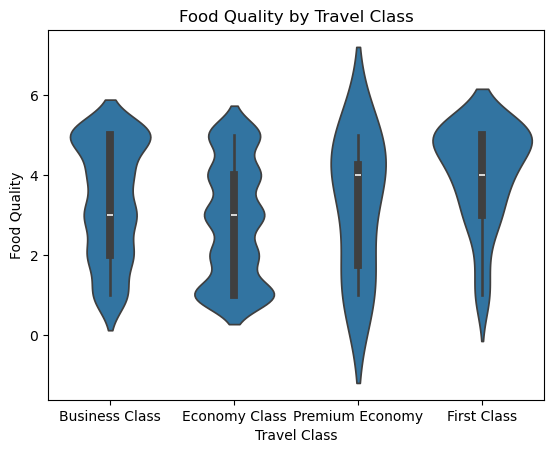

In [68]:
sns.violinplot(x="Travel Class", y="Food Quality", data=df)
plt.title("Food Quality by Travel Class")
plt.show()


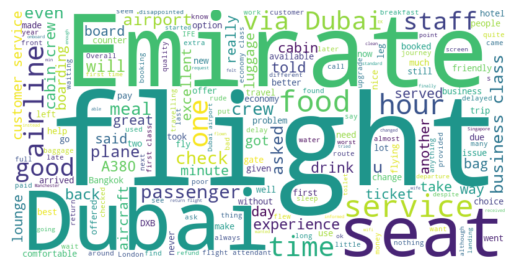

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df['Review'].astype(str))  # join all reviews into one string
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


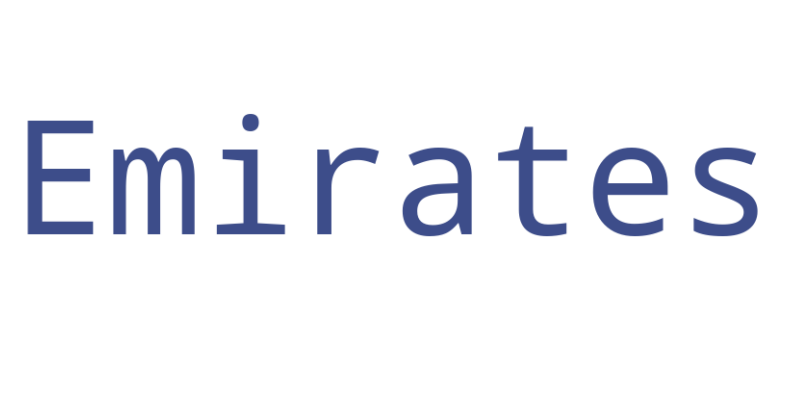

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# Combine all reviews into one string
text = " ".join(df['Review'].astype(str))

# Generate word frequencies
wc = WordCloud(width=800, height=400, background_color="white").generate(text)
words = list(wc.words_.keys())
frequencies = list(wc.words_.values())

# Set up figure
fig, ax = plt.subplots(figsize=(10,5))
ax.axis("off")

def update(frame):
    ax.clear()
    ax.axis("off")
    
    fade_frames = 20  # Number of frames for fade-out
    
    if frame < len(words):
        # Gradually add words
        current_words = words[:frame+1]
        current_freq = frequencies[:frame+1]
    else:
        # Fade out all but 'Emirates'
        fade_step = frame - len(words)
        alpha = max(0, 1 - fade_step / fade_frames)
        
        current_words = ["Emirates"]  # Always keep Emirates
        current_freq = [1.0]          # Fixed frequency for Emirates
        
        # Randomly keep other words while fading out
        for w, f in zip(words, frequencies):
            if w != "Emirates" and np.random.rand() < alpha:
                current_words.append(w)
                current_freq.append(f)
    
    # Always ensure we have at least one word
    freq_dict = dict(zip(current_words, current_freq))
    if len(freq_dict) == 0:
        freq_dict = {"Emirates": 1.0}
    
    wc_temp = WordCloud(width=800, height=400, background_color="white")
    wc_temp.generate_from_frequencies(freq_dict)
    
    ax.imshow(wc_temp, interpolation="bilinear")
    return [ax]

# Total frames
total_frames = len(words) + 25
anim = FuncAnimation(fig, update, frames=total_frames, interval=150, blit=False)

# Save as GIF (works without ffmpeg)
anim.save("wordcloud_fadeout.gif", writer="pillow", fps=5)

plt.show()


In [27]:
# Features (X) = input variables
X = df[['Seating Comfort', 'Staff Service', 'Food Quality',
        'Entertainment', 'WiFi', 'Ground Service', 'Value for Money']]

# Target (y) = outcome
y = df['Overall Rating']

print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())


Features (X):
   Seating Comfort  Staff Service  Food Quality  Entertainment  WiFi  \
0              5.0            5.0           5.0            5.0   5.0   
1              1.0            1.0           3.0            3.0   2.0   
2              2.0            1.0           4.0            2.0   3.0   
3              1.0            1.0           2.0            0.0   0.0   
4              5.0            5.0           5.0            5.0   4.0   

   Ground Service  Value for Money  
0             5.0                5  
1             3.0                2  
2             3.0                2  
3             1.0                1  
4             5.0                5  

Target (y):
0    10
1     4
2     5
3     1
4    10
Name: Overall Rating, dtype: int64
